* EDA
 * Characterisation of the data set
 * Descriptive Statistics
 * Outliers
* Handling with missing values
 * Imputing Missing Values
 
Logical justification based on the reasoning for the specific choice of machine learning approaches.

* Feature Engineering 
 * Encoding
 * Scaling 
 
* Trainig Data

Characterization of data, explanation and description of techniques used for the variation in the
accuracy across three training splits (5% / 10% / 15% / 20%) using cross validation techniques.

* Apply ML model 

Multiple machine learning approaches (at least two) using hyperparameters and a comparison between
the chosen modelling approaches

* Cross Validation

Cross-validation methods should be used to justify the authenticity of your ML results.

* Result 

Interpret and explain the results obtained, discuss overfitting / underfitting / generalisation, provide a
rationale for the chosen model and use visualisations to support your findings.


### Data Dictionary

ID: Unique passenger identifier.

Gender: Gender of the passenger (Female/Male)

Age: Age of the passenger

Customer Type: Type of airline customer (First-time/Returning)

Type of Travel: Purpose of the flight (Business/Personal)

Class: Travel class in the airplane for the passenger seat

Flight Distance: Flight distance in miles

Departure Delay: Flight departure delay in minutes

Arrival Delay: Flight arrival delay in minutes

Departure and Arrival Time Convenience: Satisfaction level of Departure/Arrival time convenient from 1 to 5

Ease of Online Booking: Satisfaction level of online booking from 1 to 5

Check-in Service: Satisfaction level of Check-in service from 1 to 5

Online Boarding: Satisfaction level of online boarding from 1 to 5

Gate Location: Satisfaction level with the gate location in the airport from 1 to 5

On-board Service: Satisfaction level with the on-boarding service in the airport from 1 to 5

Seat Comfort: Satisfaction level with the comfort of the airplane seat from 1 to 5

Leg Room Service: Satisfaction level with the leg room of the airplane seat from 1 to 5

Cleanliness: Satisfaction level with the cleanliness of the airplane from 1 to 5

Food and Drink: Satisfaction level with the food and drinks on the airplane from 1 to 5

In-flight Service: Satisfaction level with the in-flight service from 1 to 5

In-flight Wifi Service: Satisfaction level with the in-flight Wifi service from 1 to 5

In-flight Entertainment: Satisfaction level with the in-flight entertainment from 1 to 5

Baggage Handling: Satisfaction level with the baggage handling from the airline from 1 to 5

Satisfaction: Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)

# EDA

## Characterisation of the data set


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_satisfaction=pd.read_csv("airline_passenger_satisfaction.csv")
df_satisfaction.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df_satisfaction.shape

(129880, 24)

In [4]:
df_satisfaction.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [5]:
df_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

## Descriptive Statistics


In [6]:
df_satisfaction.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df_satisfaction.describe(include=object)

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


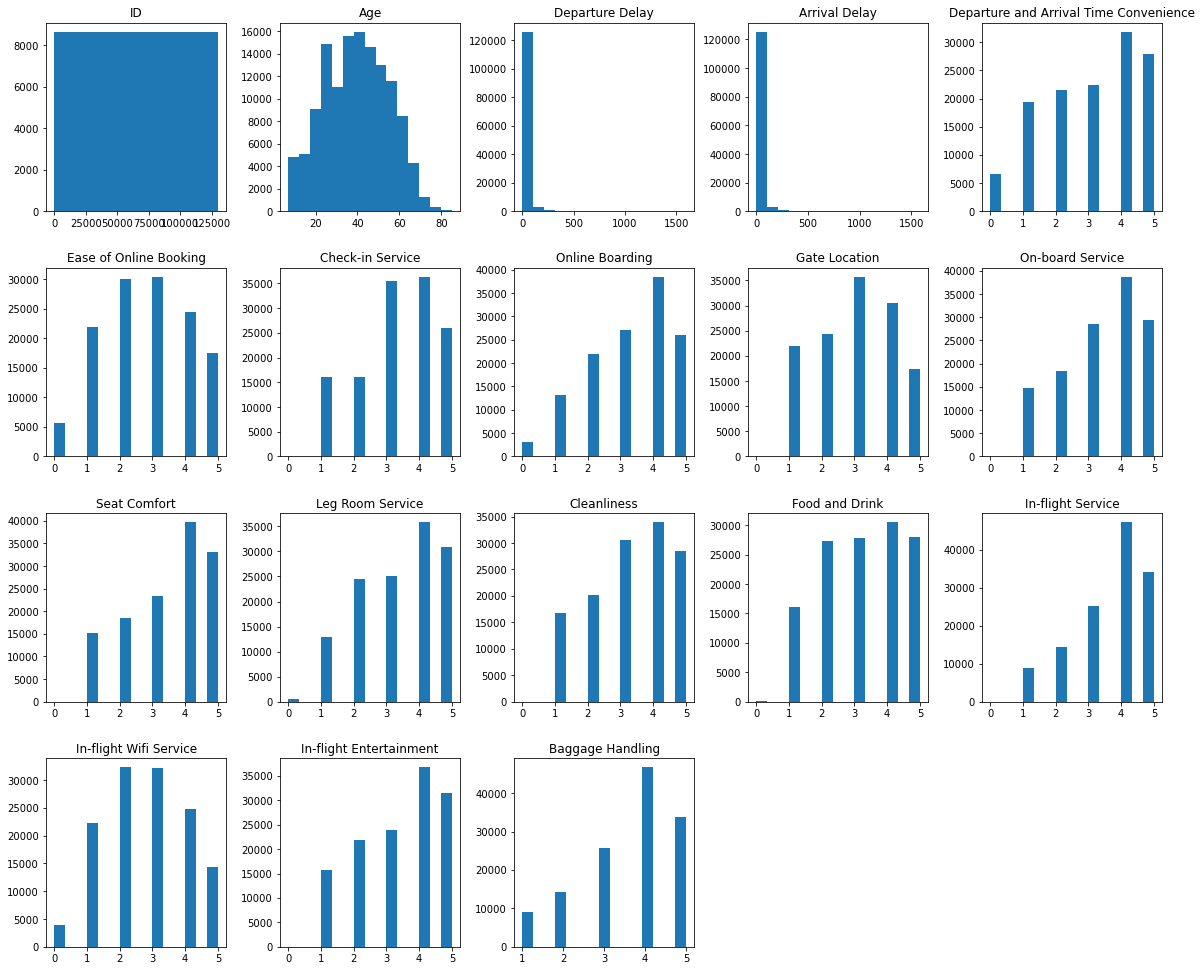

In [29]:
df_satisfaction.hist(bins = 15 , layout = (4,5), figsize = (20,17)  ,column = df_satisfaction.columns, grid = False)
plt.show()

In [17]:
df_satisfaction.skew()

ID                                        0.000000
Age                                      -0.003606
Departure Delay                           6.821980
Arrival Delay                             6.670125
Departure and Arrival Time Convenience   -0.332469
Ease of Online Booking                   -0.018779
Check-in Service                         -0.366569
Online Boarding                          -0.456911
Gate Location                            -0.058265
On-board Service                         -0.421320
Seat Comfort                             -0.485818
Leg Room Service                         -0.348414
Cleanliness                              -0.300926
Food and Drink                           -0.155063
In-flight Service                        -0.691580
In-flight Wifi Service                    0.040465
In-flight Entertainment                  -0.366385
Baggage Handling                         -0.677400
dtype: float64

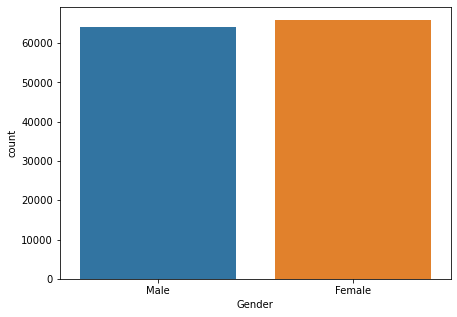

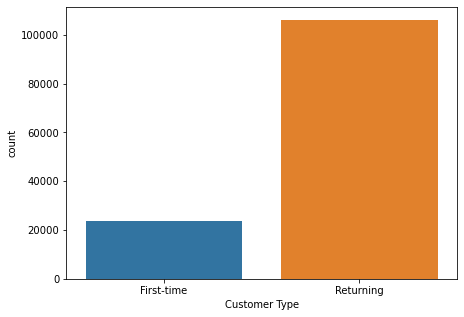

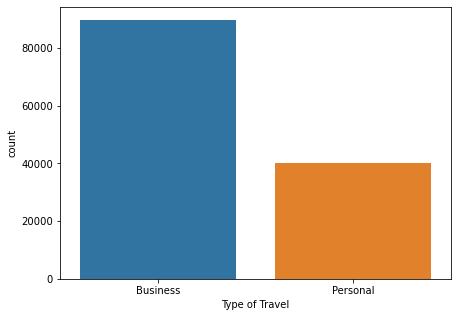

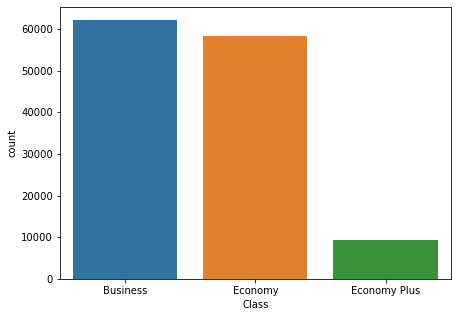

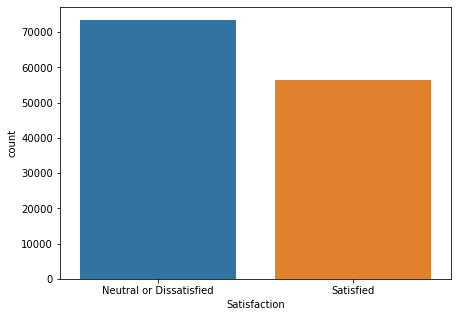

In [8]:
ColObj= ['Gender', 'Customer Type','Type of Travel','Class','Satisfaction'  ]
for col in ColObj:
    plt.figure(figsize=(7,5))
    sns.countplot(x=col,data=df_satisfaction)
    plt.show()

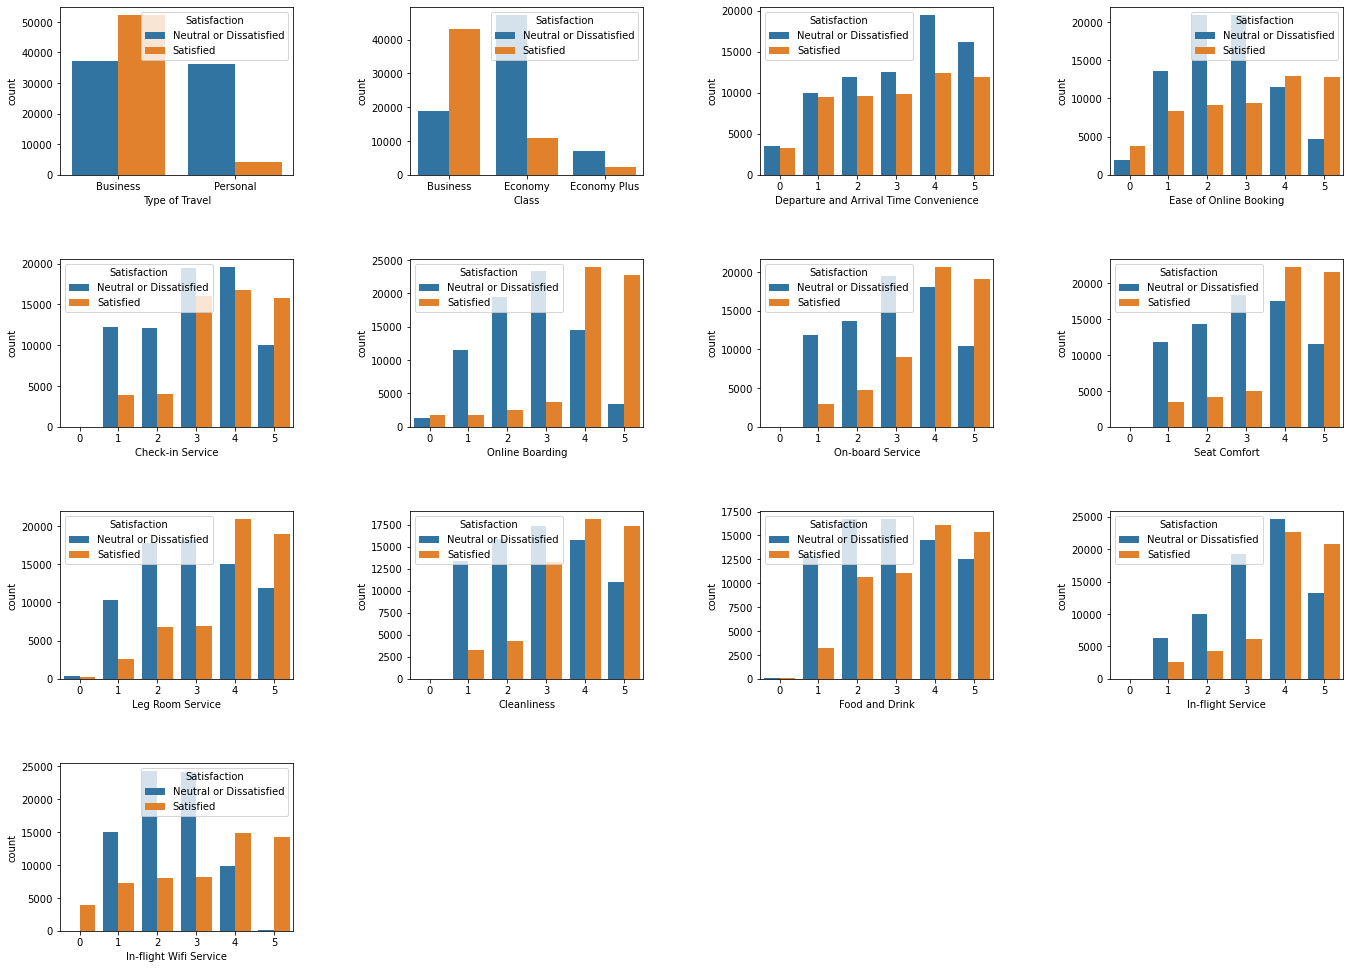

In [43]:
columns = ['Type of Travel', 'Class','Departure and Arrival Time Convenience',
      'Ease of Online Booking','Check-in Service', 'Online Boarding','On-board Service','Seat Comfort', 
      'Leg Room Service', 'Cleanliness','Food and Drink', 'In-flight Service', 'In-flight Wifi Service']
plt.figure(figsize=(23,17))

for col in range(len(columns)):
    plt.subplot(4,4,col+1)
    sns.countplot(x=df_satisfaction[columns[col]],hue=df_satisfaction['Satisfaction'])    
    plt.subplots_adjust(wspace = 0.5, hspace= 0.5)

## Outliers


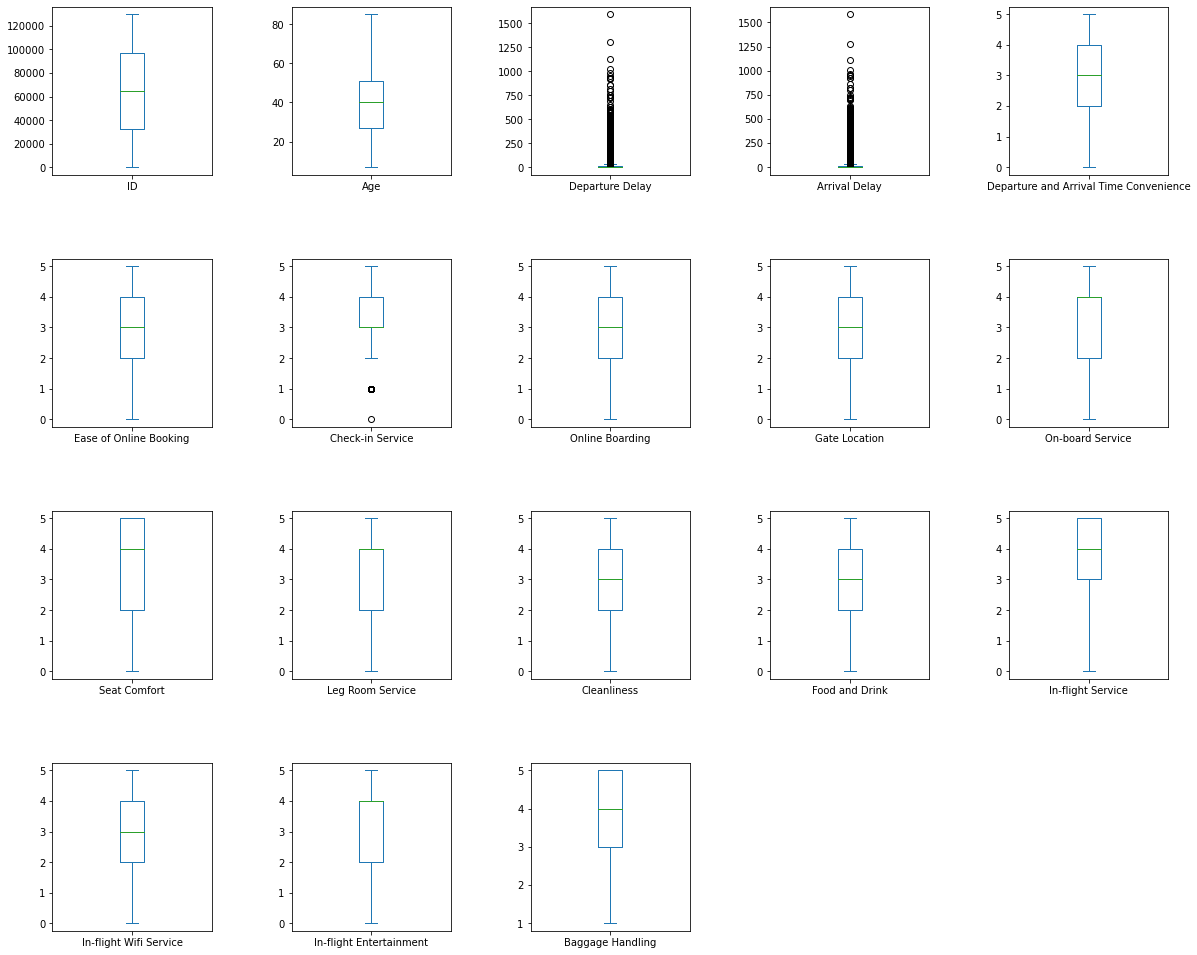

In [36]:
df_satisfaction.plot(subplots =True, kind = 'box', layout = (4,5), figsize = (20,17))
plt.subplots_adjust(wspace = 0.5, hspace= 0.5)

# Handling with missing values

In [37]:
df_satisfaction.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

<AxesSubplot:>

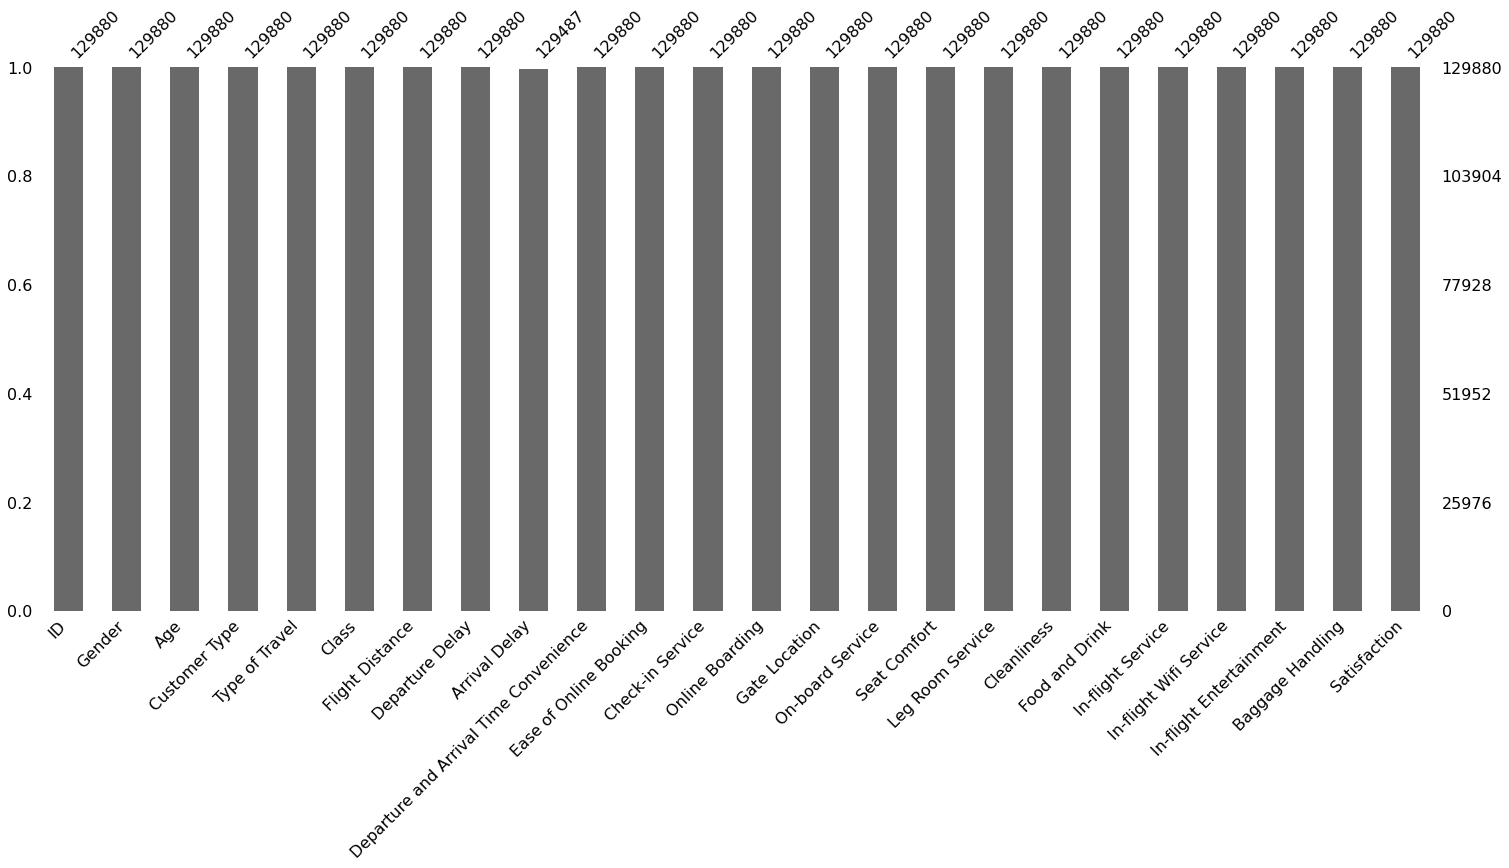

In [39]:
msno.bar(df_satisfaction)

we can see that the number of missing values is insignificant compared to the number of data contained in our dataset, we have decided to impute them with the median because it does not follow a normal distribution.

In [40]:
df_satisfaction['Arrival Delay'].fillna(df_satisfaction['Arrival Delay'].median(),inplace=True)

In [41]:
df_satisfaction.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

# Feature Engineering

According to our scenario we want to know what are the factors that impact the dissatisfaction of medium distance flights on passengers, that is why we need to convert our numerical values to categorical values in order to classify the flights according to distance, for this we will rely on the aviation rules that classify them into short, medium and long distance. 

In [14]:
df_satisfaction.groupby("Flight Distance")["Flight Distance"].count()

Flight Distance
Short     62518
Medium    43876
Long      23486
Name: Flight Distance, dtype: int64

we are use datafream.cut() to convert the column "distance of flights" from a continuous variable to a categorical variable, because we will see the impact of the variables on **Median flights**


In [9]:
bins=[-math.inf,800,2200,math.inf]
distance=["Short","Medium", "Long"]

df_satisfaction["Flight Distance"]= pd.cut(df_satisfaction["Flight Distance"],bins,labels=distance)

In [10]:
df_satisfaction.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,Medium,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,Medium,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,Medium,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,Medium,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,Long,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


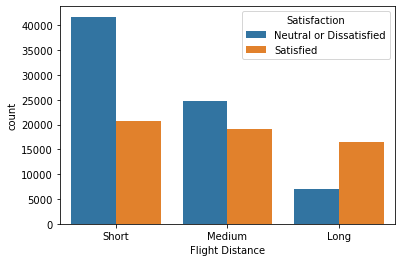

In [11]:
sns.countplot(x = 'Flight Distance', hue = 'Satisfaction', data = df_satisfaction)
plt.show()

we need to get rid of rows containing flight data, short and long.

## Encoding

## Scaling